문제) 제공 되는 'auto-mpg.csv' 파일에 대하여 EDA를 수행 후 소프트맥스 회귀 모델을 구현
      - ‘horsepower’를 저출력, 보통출력, 고출력을 갖는 범주형을 추가한 후 소프트맥스 회귀 모델을 작성

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option( 'display.max_columns', 10 )

# softmax 회귀 모델

## 1. 데이터 준비

In [3]:
# csv파일 데이터프레임으로 변환
raw_df = pd.read_csv( 'auto-mpg.csv', header = None, encoding = 'utf-8' )

In [4]:
# 열이름 지정
raw_df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model', 'origin', 'name' ]

In [5]:
raw_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
df = raw_df.copy()

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 'name'변수 제거

In [8]:
df.pop( 'name' )

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## 2. 데이터 탐색

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [11]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### 엔진 출력인 'horsepower' 변수가 포함되어 있지 않으므로 자료형 변경

In [12]:
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
df[ 'horsepower' ].replace( '?', np.nan, inplace = True )
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True )
df[ 'horsepower' ].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [14]:
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' )

In [15]:
origin = df.pop( 'origin' )

In [16]:
df['USA'] = ( origin == 1 ) * 1.0
df['Europe'] = ( origin == 2 ) * 1.0
df['Japan'] = ( origin == 3 ) * 1.0

In [17]:
# np.histogram 함수로 3개의 bin으로 나누는 경계값의 리스트 생성
count, bin_dividers = np.histogram( df[ 'horsepower' ], bins = 3 )

In [18]:
bin_names = [ '저출력', '보통출력', '고출력' ]

In [19]:
# pd.cut으로 각 데이터를 3개의 bin에 할당
df[ 'hp_bin' ] = pd.cut( x = df[ 'horsepower' ],
                         bins = bin_dividers,
                         labels = bin_names,
                         include_lowest = True )

In [20]:
df[ 'hp_bin' ] = df[ 'hp_bin' ].replace(['저출력','보통출력', '고출력'], [ 0, 1, 2 ] )
df.head()

,mpg,cylinders,displacement,horsepower,weight,...,model,USA,Europe,Japan,hp_bin
0,18.0,8,307.0,130.0,3504.0,...,70,1.0,0.0,0.0,1
1,15.0,8,350.0,165.0,3693.0,...,70,1.0,0.0,0.0,1
2,18.0,8,318.0,150.0,3436.0,...,70,1.0,0.0,0.0,1
3,16.0,8,304.0,150.0,3433.0,...,70,1.0,0.0,0.0,1
4,17.0,8,302.0,140.0,3449.0,...,70,1.0,0.0,0.0,1


In [21]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,...,model,USA,Europe,Japan,hp_bin
393,27.0,4,140.0,86.0,2790.0,...,82,1.0,0.0,0.0,0
394,44.0,4,97.0,52.0,2130.0,...,82,0.0,1.0,0.0,0
395,32.0,4,135.0,84.0,2295.0,...,82,1.0,0.0,0.0,0
396,28.0,4,120.0,79.0,2625.0,...,82,1.0,0.0,0.0,0
397,31.0,4,119.0,82.0,2720.0,...,82,1.0,0.0,0.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model         392 non-null    int64  
 7   USA           392 non-null    float64
 8   Europe        392 non-null    float64
 9   Japan         392 non-null    float64
 10  hp_bin        392 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 36.8 KB


In [23]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,...,model,USA,Europe,Japan,hp_bin
count,392.000000,392.000000,392.000000,392.000000,392.000000,...,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,...,75.979592,0.625000,0.173469,0.201531,0.426020
std,7.805007,1.705783,104.644004,38.491160,849.402560,...,3.683737,0.484742,0.379136,0.401656,0.639402
min,9.000000,3.000000,68.000000,46.000000,1613.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,...,73.000000,0.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,...,76.000000,1.000000,0.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,...,79.000000,1.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,...,82.000000,1.000000,1.000000,1.000000,2.000000


### 훈련용 데이터 셋과 테스트용 데이터 셋 분리

In [24]:
train_df = df.sample( frac = 0.8, random_state = 0 )
test_df = df.drop( train_df.index )

In [25]:
print( 'train data 개수 : {:5d}'.format( len( train_df ) ) )
print( 'test data 개수 : {:5d}'.format( len( test_df ) ) )

train data 개수 :   314
test data 개수 :    78


In [26]:
# 학습용 데이터
train_df.head()

,mpg,cylinders,displacement,horsepower,weight,...,model,USA,Europe,Japan,hp_bin
146,28.0,4,90.0,75.0,2125.0,...,74,1.0,0.0,0.0,0
282,22.3,4,140.0,88.0,2890.0,...,79,1.0,0.0,0.0,0
69,12.0,8,350.0,160.0,4456.0,...,72,1.0,0.0,0.0,1
378,38.0,4,105.0,63.0,2125.0,...,82,1.0,0.0,0.0,0
331,33.8,4,97.0,67.0,2145.0,...,80,0.0,0.0,1.0,0


In [27]:
# 테스트용 데이터
test_df.head()

,mpg,cylinders,displacement,horsepower,weight,...,model,USA,Europe,Japan,hp_bin
9,15.0,8,390.0,190.0,3850.0,...,70,1.0,0.0,0.0,2
25,10.0,8,360.0,215.0,4615.0,...,70,1.0,0.0,0.0,2
28,9.0,8,304.0,193.0,4732.0,...,70,1.0,0.0,0.0,2
31,25.0,4,113.0,95.0,2228.0,...,71,0.0,0.0,1.0,0
33,19.0,6,232.0,100.0,2634.0,...,71,1.0,0.0,0.0,0


## 3. 속성 선택

- softmax 회귀 모델 변수로 사용할 후보 변수를 선택한다.
- 예측 목표 변수인 종속 변수( y )가 될 'hp_bin' 변수와 독립 변수( X )로 사용할 후보로 3개 변수(  'cylinders', 'displacement', 'horsepower', 'weight' )를 포함

In [28]:
df = train_df[ [ 'hp_bin', 'cylinders', 'displacement', 'horsepower', 'weight' ] ]
df.head()

,hp_bin,cylinders,displacement,horsepower,weight
146,0,4,90.0,75.0,2125.0
282,0,4,140.0,88.0,2890.0
69,1,8,350.0,160.0,4456.0
378,0,4,105.0,63.0,2125.0
331,0,4,97.0,67.0,2145.0


In [29]:
df.describe()

,hp_bin,cylinders,displacement,horsepower,weight
count,314.000000,314.000000,314.000000,314.000000,314.000000
mean,0.426752,5.477707,195.318471,104.869427,2990.251592
std,0.631483,1.699788,104.331589,38.096214,843.898596
min,0.000000,3.000000,68.000000,46.000000,1649.000000
25%,0.000000,4.000000,105.500000,76.250000,2256.500000
50%,0.000000,4.000000,151.000000,94.500000,2822.500000
75%,1.000000,8.000000,265.750000,128.000000,3608.000000
max,2.000000,8.000000,455.000000,225.000000,5140.000000


### 정규화

In [30]:
df_stats = df.describe()
df_stats.pop( "hp_bin" )
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0


### y( Label ) 분리

In [31]:
y_train = np.asarray( train_df.pop( 'hp_bin' ) )
y_test = np.asarray( test_df.pop( 'hp_bin' ) )

In [32]:
# y에 대한 One-Hot encoding
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )

In [33]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1

In [34]:
print( len( y_train ), len( y_test ) )

314 78


In [35]:
def normalization( x ):
  return ( x - df_stats[ 'mean' ] ) / df_stats[ 'std' ]

normed_train_df = normalization( train_df )
normed_test_df = normalization( test_df )

## 4. 모델 학습

### 훈련 / 테스트 데이터 NumPy  배열로 변환

# softmax 회귀 모델

### 훈련 / 테스트 데이터 NumPy  배열로 변환

In [36]:
X_train = np.asarray( normed_train_df[ [ 'cylinders', 'displacement', 'horsepower', 'weight' ] ] ) 
X_test = np.asarray( normed_test_df[ [  'cylinders', 'displacement', 'horsepower', 'weight'  ] ] )

In [37]:
print( len( X_train ), len( X_test ) )

314 78


In [38]:
print( len( y_train ), len( y_test ) )

314 78


### Keras 모델구성

In [39]:
X_train = np.array( X_train )
X_test = np.array( X_test )

In [40]:
model = Sequential()
model.add( Dense( 3, input_dim = 4, activation = 'softmax' ) )
sgd = optimizers.SGD( lr = 0.0001 )
model.compile( optimizer = 'adam' ,loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( X_train, y_train, batch_size = 1, epochs = 200, validation_split = 0.2 )

Train on 251 samples, validate on 63 samples
Epoch 1/200
251/251 [==============================] - 1s 4ms/sample - loss: 1.1580 - accuracy: 0.5259 - val_loss: 0.7553 - val_accuracy: 0.6825
Epoch 2/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.7915 - accuracy: 0.5817 - val_loss: 0.6004 - val_accuracy: 0.6984
Epoch 3/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.6185 - accuracy: 0.6255 - val_loss: 0.5589 - val_accuracy: 0.6508
Epoch 4/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.5425 - accuracy: 0.7610 - val_loss: 0.5475 - val_accuracy: 0.7143
Epoch 5/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.5015 - accuracy: 0.7809 - val_loss: 0.5381 - val_accuracy: 0.7143
Epoch 6/200
251/251 [==============================] - ETA: 0s - loss: 0.4716 - accuracy: 0.78 - 0s 1ms/sample - loss: 0.4741 - accuracy: 0.7928 - val_loss: 0.5264 - val_accuracy: 0.7302
Epoch 7/200
251/251 [======================

251/251 [==============================] - 0s 1ms/sample - loss: 0.1623 - accuracy: 0.9641 - val_loss: 0.2112 - val_accuracy: 0.8730
Epoch 57/200
251/251 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.96 - 0s 1ms/sample - loss: 0.1603 - accuracy: 0.9641 - val_loss: 0.2071 - val_accuracy: 0.8730
Epoch 58/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.1587 - accuracy: 0.9641 - val_loss: 0.2019 - val_accuracy: 0.8889
Epoch 59/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.1564 - accuracy: 0.9641 - val_loss: 0.1989 - val_accuracy: 0.8889
Epoch 60/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.1547 - accuracy: 0.9641 - val_loss: 0.2010 - val_accuracy: 0.8730
Epoch 61/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.1527 - accuracy: 0.9641 - val_loss: 0.1976 - val_accuracy: 0.8730
Epoch 62/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.1510 - accuracy

Epoch 112/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0981 - accuracy: 0.9801 - val_loss: 0.1310 - val_accuracy: 0.9365
Epoch 113/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0974 - accuracy: 0.9801 - val_loss: 0.1308 - val_accuracy: 0.9365
Epoch 114/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0970 - accuracy: 0.9801 - val_loss: 0.1303 - val_accuracy: 0.9365
Epoch 115/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0962 - accuracy: 0.9801 - val_loss: 0.1314 - val_accuracy: 0.9206
Epoch 116/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0959 - accuracy: 0.9801 - val_loss: 0.1293 - val_accuracy: 0.9365
Epoch 117/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0951 - accuracy: 0.9841 - val_loss: 0.1328 - val_accuracy: 0.9206
Epoch 118/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0947 - accuracy: 0.9801 - val_loss: 0

251/251 [==============================] - 0s 1ms/sample - loss: 0.0750 - accuracy: 0.9841 - val_loss: 0.1087 - val_accuracy: 0.9365
Epoch 168/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0747 - accuracy: 0.9880 - val_loss: 0.1075 - val_accuracy: 0.9365
Epoch 169/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0744 - accuracy: 0.9801 - val_loss: 0.1044 - val_accuracy: 0.9365
Epoch 170/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0743 - accuracy: 0.9801 - val_loss: 0.1032 - val_accuracy: 0.9365
Epoch 171/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0737 - accuracy: 0.9841 - val_loss: 0.1009 - val_accuracy: 0.9683
Epoch 172/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0734 - accuracy: 0.9841 - val_loss: 0.1003 - val_accuracy: 0.9683
Epoch 173/200
251/251 [==============================] - 0s 1ms/sample - loss: 0.0731 - accuracy: 0.9801 - val_loss: 0.1033 - val_ac

In [41]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs = range( 1, len( history.history[ 'accuracy' ] ) + 1 )

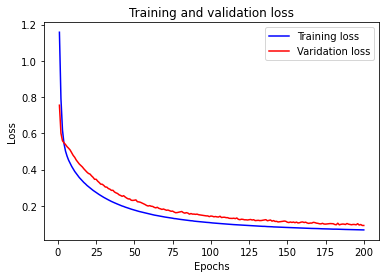

In [43]:
plt.plot( epochs, loss, 'b', label = 'Training loss' )
plt.plot( epochs, val_loss, 'r', label = 'Varidation loss' )
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [44]:
hist = pd.DataFrame(history.history)
hist[ 'epoch' ] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.067836,0.984064,0.101332,0.936508,195
196,0.067384,0.984064,0.093683,0.968254,196
197,0.067552,0.980080,0.096696,0.968254,197
198,0.066922,0.984064,0.091531,0.968254,198
199,0.066946,0.984064,0.091448,0.968254,199


# 5. 평가

In [45]:
print( '테스트 정확도 : {:.4f}'.format( model.evaluate( X_test, y_test )[ 1 ] ) )

78/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================